# Polyalphabetische Chiffren
(Vigenère Chiffre)

Bereits im 9. Jahrhundert wurde im islamischen Raum die grosse Schwachstelle
monoalphabetischer Chiffren (Caesar-Chiffre) erkannt. Die Verteilung der
Buchstaben folgt in jeder Sprache einem spezifischen aber konstanten Muster. Für
die deutsche Sprache ist die Verteilung der folgenden Tabelle zu entnehmen.

| Buchstabe | relative Häufigkeit | Buchstabe | relative Häufigkeit | Buchstabe | relative Häufigkeit |
| --- | --- | --- | --- | --- | --- | 
| a | 0.0651 | l | 0.0344 | w | 0.0189 |
| b | 0.0189 | m | 0.0253 | x | 0.0003 |
| c | 0.0306 | n | 0.0978 | y | 0.0004 |
| d | 0.0508 | o | 0.0251 | z | 0.0113 |
| e | 0.1740 | p | 0.0079 | |
| f | 0.0166 | q | 0.0002 | |
| g | 0.0301 | r | 0.0700 | |
| h | 0.0476 | s | 0.0727 | |
| i | 0.0755 | t | 0.0615 | |
| j | 0.0027 | u | 0.0435 | |
| k | 0.0121 | v | 0.0067 | |

Um zu zeigen, dass dies sich mit (längeren) Texten deckt, wurde ein Kapitel aus
dem Roman 'Der Zauberberg' von Thomas Mann ausgewertet. Die sich
aus dieser Auswertung ergebende Verteilung wird in der folgenden Grafik der
Verteilung aus der Tabelle gegenübergestellt.

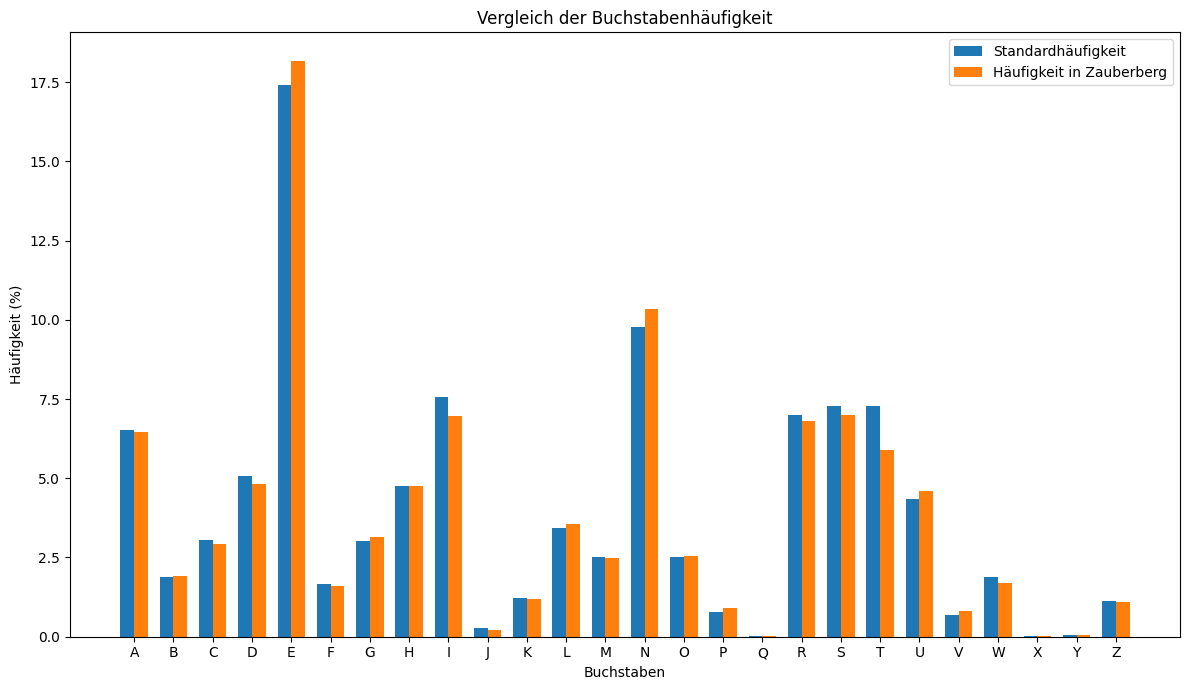

In [13]:
import pdfplumber
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
with pdfplumber.open("C:/Users/jcms/Zotero/storage/Q44XL4TW/Mann_1989_Der Zauberberg - Roman.pdf") as pdf:
    pages = pdf.pages
    text = ""
    for i, pg in enumerate(pages):
        if i >= 23 and i < 42:
            text += pages[i].extract_text() + "\n"
def text_cleaning(text : str) -> str:
    clean = text.upper() \
                .replace('Ä', 'AE') \
                .replace('Ö', 'OE') \
                .replace('Ü', 'UE') \
                .replace('ß', 'SS') \
                .replace(' ', '') \

    cleaned_text = ''

    for c in clean:
        if c.isalpha():
            cleaned_text += c
    
    return cleaned_text

def file_writer(path : str, text : str) -> None:
    i = 0
    grouped_text = ""
    for c in text:
        i += 1
        if i % 50 == 0:
            grouped_text += c + "\n"
        elif i % 5 == 0:
            grouped_text += c + " "
        else:
            grouped_text += c
        
    with open(path, mode='w', encoding='utf-8') as f:
        f.write(grouped_text)
zauberberg = text_cleaning(text)
file_writer('zauberberg_bereinigt.txt', zauberberg)
def letter_frequency(text: str) -> dict:
    frequency = {}
    total_letters = 0
    
    for char in text:
        if char not in frequency:
            frequency[char] = 1
        else:
            frequency[char] += 1
        total_letters += 1
        
    for key, value in frequency.items():
        frequency[key] = (value / total_letters) * 100
        
           
    return frequency

frequency_zauberberg = letter_frequency(zauberberg)


standard_frequency = {
    'E': 17.4,
    'T': 7.27,
    'A': 6.51,
    'O': 2.51,
    'I': 7.55,
    'N': 9.78,
    'S': 7.27,
    'R': 7.0,
    'H': 4.76,
    'D': 5.08,
    'L': 3.44,
    'C': 3.06,
    'U': 4.35,
    'M': 2.53,
    'W': 1.89,
    'F': 1.66,
    'G': 3.01,
    'Y': 0.04,
    'P': 0.79,
    'B': 1.89,
    'V': 0.67,
    'K': 1.21,
    'J': 0.27,
    'X': 0.03,
    'Q': 0.02,
    'Z': 1.13
}


df = pd.DataFrame.from_dict([standard_frequency, frequency_zauberberg])
df.index = ['Standard Frequency', 'Zauberberg Frequency']
dft = df.T
dft = dft.sort_index()
dft['Standard Frequency'] = dft['Standard Frequency'].astype(float)
dft['Zauberberg Frequency'] = dft['Zauberberg Frequency'].astype(float)
# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standardhäufigkeit')
ax.bar(x + bar_width/2, dft['Zauberberg Frequency'], bar_width, label='Häufigkeit in Zauberberg')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Buchstaben')
ax.set_ylabel('Häufigkeit (%)')
ax.set_title('Vergleich der Buchstabenhäufigkeit')
ax.legend()
plt.tight_layout()

plt.show()

Die Grafik zeigt, dass bei einer Textlänge von 51'396 Buchstaben die Verteilung
in einem literarischen Text nahezu identisch ist, mit der allgemeinen
Häufigkeitsverteilung in der deutschen Sprache.

Die nächste Grafik zeigt, was mit der Verteilung der Buchstaben geschieht, wenn
der gleiche Text mit einer Caesar-Chiffre verschlüsselt worden ist.

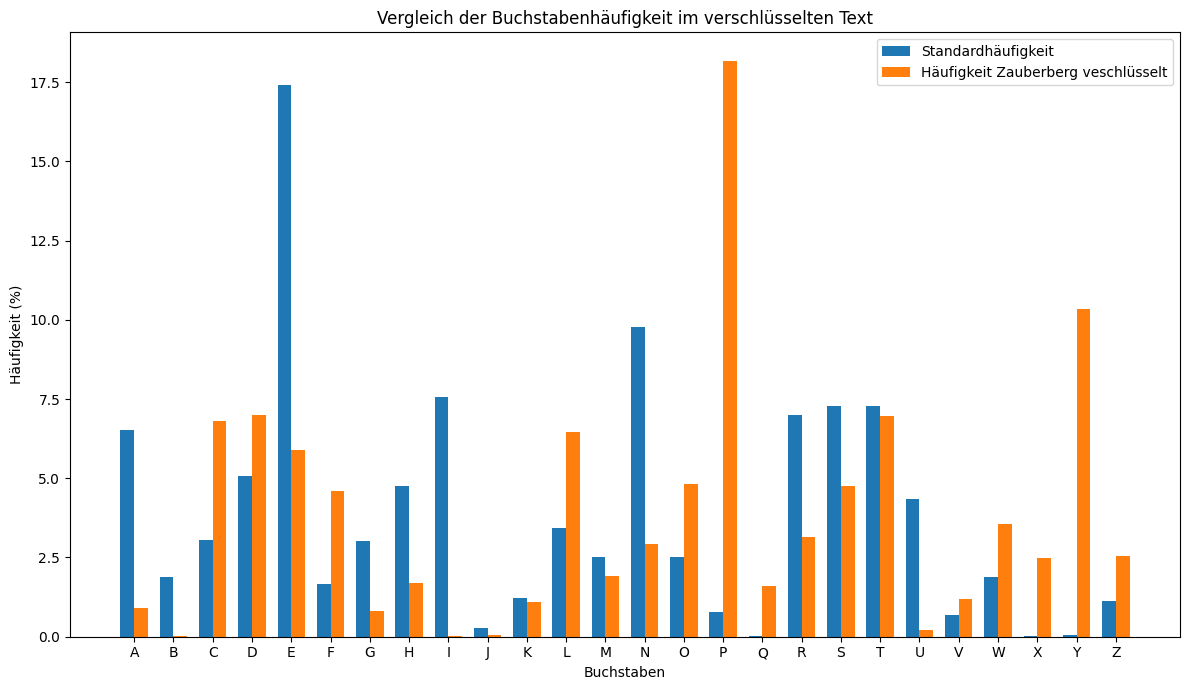

In [18]:
def caesar(text : str, shift : int, encrypt=True) -> str:
    text = text.upper()
    result = ""
    
    if encrypt:
        for char in text:
            shifted = (ord(char) - ord('A') + shift) % 26 + ord('A')
            result += chr(shifted)
    else:
        for char in text:
            shifted = (ord(char) - ord('A') - shift) % 26 + ord('A')
            result += chr(shifted)
            
    return result


zauberberg_verschluesselt = caesar(zauberberg, 11, encrypt=True)
frequency_zauberberg_verschluesselt = letter_frequency(zauberberg_verschluesselt)
dft['Zauberberg Frequency Encrypted'] = pd.Series(frequency_zauberberg_verschluesselt)

# --- Erstellen Sie das Side-by-Side-Balkendiagramm ---
# Legen Sie die Breite der Balken fest
bar_width = 0.35

# Verwenden Sie den Index des transponierten DataFrames (dft)
x = np.arange(len(dft.index))

fig, ax = plt.subplots(figsize=(12, 7))

# Zeichnen Sie die Balken für die beiden Spalten aus dft
ax.bar(x - bar_width/2, dft['Standard Frequency'], bar_width, label='Standardhäufigkeit')
ax.bar(x + bar_width/2, dft['Zauberberg Frequency Encrypted'], bar_width, label='Häufigkeit Zauberberg veschlüsselt')

ax.set_xticks(x)
ax.set_xticklabels(dft.index)

ax.set_xlabel('Buchstaben')
ax.set_ylabel('Häufigkeit (%)')
ax.set_title('Vergleich der Buchstabenhäufigkeit im verschlüsselten Text')
ax.legend()
plt.tight_layout()

plt.show()

Es ist deutlich zu erkennen, dass die Verteilung dem gleichen Muster folgt -
verschoben um fünf Positionen. Diese Auswertung ermöglicht die Entschlüsselung
des Textes, ohne alle möglichen Schlüsselalphabete durchzuprobieren.